In [15]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from PIL import Image

if __name__ == "__main__":
    img = cv2.imread('face.jpg', 0)
    # img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    img = cv2.resize(img, (299,299))
    img_float = np.float32(img)
    dct = cv2.dct(img_float)

    cv2.imshow('dct', dct)


    key = cv2.waitKey(0)
    if key == 27:  #如果按esc键,则停止
        cv2.destroyAllWindows()

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import cv2


#图像尺寸size*size
size = 299

# utils
def DCT_mat(size):
    m = [[ np.sqrt(1./size) if i == 0 else np.sqrt(2./size) * np.cos((j + 0.5) * np.pi * i / size) for j in range(size)] for i in range(size)]
    return m
def generate_filter(start, end, size):  #产生一个二维矩阵,宽和高都为size,且所包含元素要么为0.0要么为1.0
    return [[0. if i + j > end or i + j < start else 1. for j in range(size)] for i in range(size)]

# generator mask
low = generate_filter(0,size // 2.82, size)
middle = generate_filter(size // 2.82, size // 2, size)
high = generate_filter(size // 2, size * 2, size)

#DCT Matrix
DCT_all = np.array(DCT_mat(size))
DCT_all_T = DCT_all.T

img = cv2.imread('face.jpg', 0)
img1 = img.astype('float')
img1 = cv2.resize(img1, (size,size))

dct = np.dot(DCT_all, img1)
dct = np.dot(dct, DCT_all_T)

dct_show = 20 * np.log(abs(dct))

cv2.imshow('img1', img1.astype(np.uint8))
cv2.imshow('dct_show', dct_show.astype(np.uint8))
key = cv2.waitKey(0)
if key == 27:  #如果按esc键,则停止
    cv2.destroyAllWindows()

# plt.subplot(121)
# plt.xticks([]), plt.yticks([])
# plt.title('original image')
# plt.imshow(img1, 'gray')

# plt.subplot(122)
# plt.xticks([]), plt.yticks([])
# plt.title('dct image')
# plt.imshow(dct, 'gray')


plt.show()



pass

## DCT basis functions的可视化

refer to "https://github.com/btlorch/dct-coefficient-decoder/blob/master/discrete_cosine_transform_visual_explanation.ipynb"

**(1)DCT变换公式:**
$$
F(i, j) = \alpha(i) \alpha(j) \sum\limits_{x=0}^{N-1} \sum\limits_{y=0}^{N-1} f(x, y) \cos\left(\frac{\pi (2x + 1) i}{2N}\right) \cos\left(\frac{\pi (2y + 1) j}{2N}\right)
$$
i, j = 0, 1, 2, ..., N-1

**(2)IDCT变换:**
$$
f(x, y) = \sum\limits_{i=0}^{N-1} \sum\limits_{j=0}^{N-1} \alpha(i) \alpha(j) F(i, j) \cos\left(\frac{\pi(2x + 1)i}{2N}\right) \cos\left(\frac{\pi (2y + 1) j}{2N}\right)
$$
x, y = 0, 1, 2, ..., N-1

In [11]:
import numpy as np

def dct_2d_basis_functions(N):
    base_funcs = np.zeros((N, N, N, N))
    
    for j in range(N):
        for i in range(N):
            alpha_i = np.sqrt(1/N) if i == 0 else np.sqrt(2/N)
            alpha_j = np.sqrt(1/N) if j == 0 else np.sqrt(2/N)
            
            for y in range(N):
                for x in range(N):
                    base_funcs[j, i, y, x] = alpha_i * alpha_j * np.cos((np.pi * (2 * x + 1) * i)/(2 * N)) * np.cos((np.pi * (2 * y + 1) * j) / (2 * N))
                    
    return base_funcs

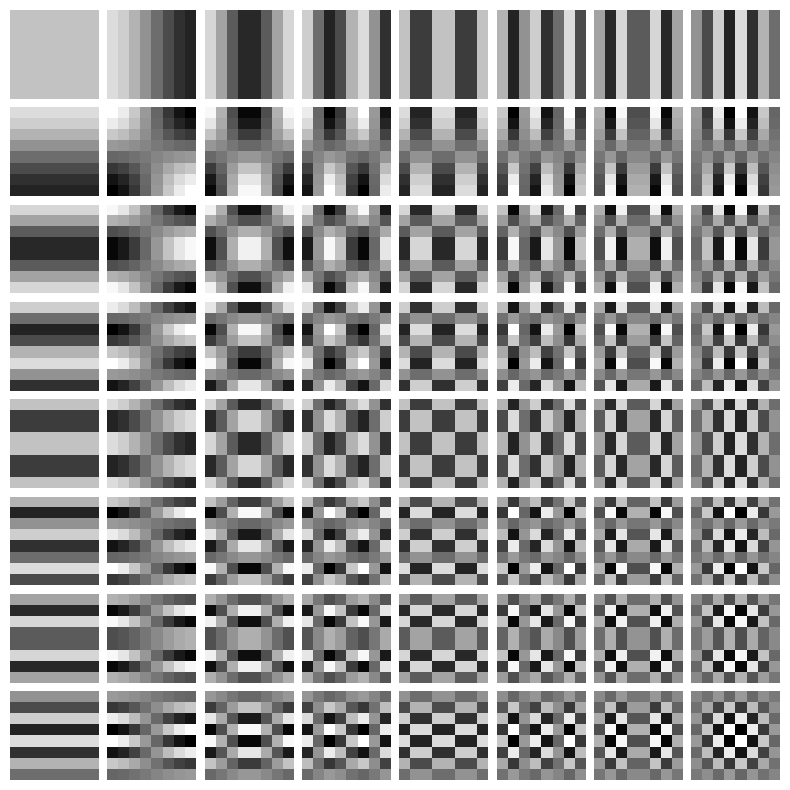

In [14]:
#可视化
%matplotlib inline
import matplotlib.pyplot as plt


waveforms_2d = dct_2d_basis_functions(8)

fig, axes = plt.subplots(nrows=8, ncols=8, figsize=(8, 8))
for j in range(8):
    for i in range(8):
        axes[j, i].imshow(waveforms_2d[j, i], vmin=waveforms_2d.min(), vmax=waveforms_2d.max(), cmap='gray')
        axes[j, i].axis('off')
        
fig.tight_layout()
fig.subplots_adjust(wspace=0.1, hspace=0.1)
# fig.show()